In [1]:
import pandas as pd
import matplotlib.pyplot as mb
import seaborn as sn
df = pd.read_csv(r'C:\Users\ilyes\Downloads\titanic-passengers.csv',sep=';')
df.head(5)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [2]:
#fill missing values
df['Age'].fillna(df['Age'].mean(),inplace=True)
df["Cabin"].fillna('G6',inplace=True)
df["Embarked"].fillna('G6',inplace=True)
print(df)

     PassengerId Survived  Pclass  \
0            343       No       2   
1             76       No       3   
2            641       No       3   
3            568       No       3   
4            672       No       1   
..           ...      ...     ...   
886           10      Yes       2   
887           61       No       3   
888          535       No       3   
889          102       No       3   
890          428      Yes       2   

                                                  Name     Sex        Age  \
0                           Collander, Mr. Erik Gustaf    male  28.000000   
1                              Moen, Mr. Sigurd Hansen    male  25.000000   
2                               Jensen, Mr. Hans Peder    male  20.000000   
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.000000   
4                               Davidson, Mr. Thornton    male  31.000000   
..                                                 ...     ...        ...   
886             

In [3]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:title={'center':'bar plot of age '}, xlabel='Age', ylabel='Survived'>

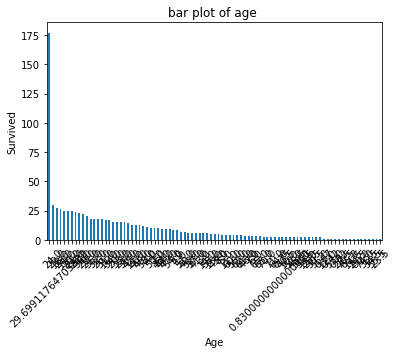

In [4]:
mb.xlabel("Age")
mb.ylabel("Survived")
mb.title("bar plot of age ")
vc=df['Age'].value_counts()
vc.plot.bar(rot=45)

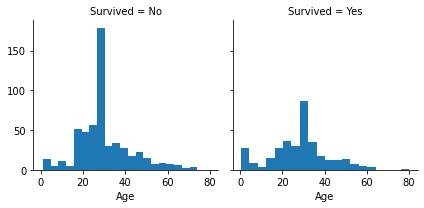

In [5]:
g=sn.FacetGrid(df,col="Survived")
g.map(mb.hist,'Age',bins=20)

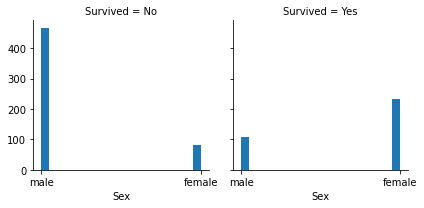

In [6]:
g=sn.FacetGrid(df,col="Survived")
g.map(mb.hist,'Sex',bins=20)

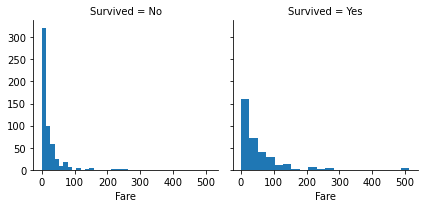

In [7]:
g=sn.FacetGrid(df,col="Survived")
g.map(mb.hist,'Fare',bins=20)

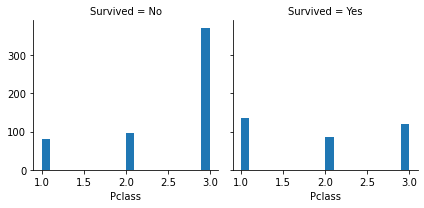

In [8]:
g=sn.FacetGrid(df,col="Survived")
g.map(mb.hist,'Pclass',bins=20)

In [9]:
def plot_correlation_map():
    corr=df.corr()
    s,ax=mb.subplots(figsize=(12,10))
    cmap = sn.diverging_palette( 220 , 10 , as_cmap = True )
    s = sn.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )


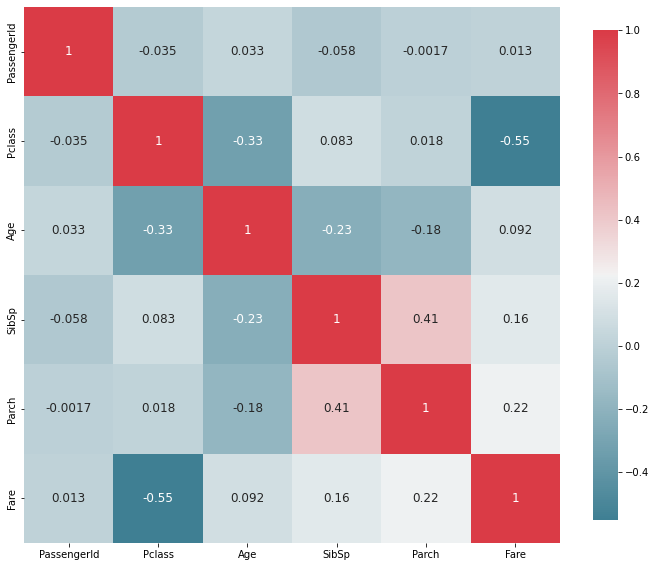

In [10]:
plot_correlation_map()

In [11]:
cleanup={"Survived":{"yes":1, "no": 0}} 
df.replace(cleanup, inplace=True)
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

C:\Users\ilyes\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
Pclass
1
2
3


In [12]:
df.drop(columns=['PassengerId','Ticket','Cabin'],inplace=True)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,13.0000,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,7.6500,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,7.8542,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,21.0750,S
4,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,52.0000,S
...,...,...,...,...,...,...,...,...,...
886,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,C
887,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,7.2292,C
888,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,8.6625,S
889,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,7.8958,S


In [19]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.00,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.65,F G73,S


In [44]:
g=sn.FacetGrid(df,col="Title")
g.map(mb.hist,'Sex',bins=20)

KeyError: 'Title'

In [25]:
txt="Davidson, Mr. Thornton"
p=txt.split(", ")
p_1=p[1].split(".")
print(p_1[0])

Mr


In [26]:
def split_1(txt):
    p=txt.split(", ")
    p_1=p[1].split(".")
    return(p_1[0])

In [29]:
df['title']=df['Name'].apply(split_1)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.00,G6,S,Mr
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.65,F G73,S,Mr


In [30]:
df['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Dr', 'Major', 'Don', 'Master', 'Rev', 'Col',
       'Mlle', 'Lady', 'Jonkheer', 'Mme', 'Sir', 'Capt', 'the Countess',
       'Ms'], dtype=object)

In [31]:
df['title'].nunique()

17

<AxesSubplot:xlabel='title', ylabel='count'>

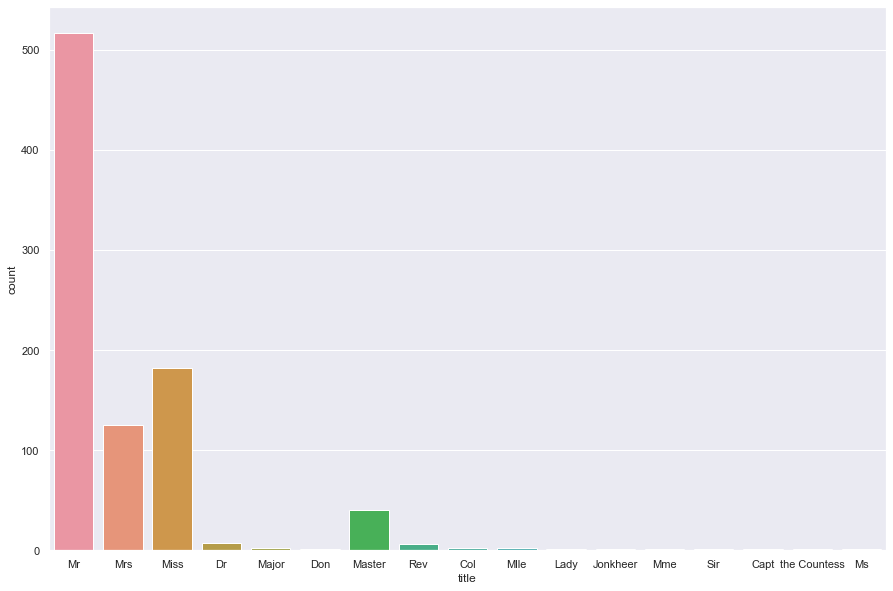

In [34]:
sn.set(rc={'figure.figsize':(15,10)})
sn.countplot(x='title',data=df,)

In [40]:
dict_titles={"Capt":"Officer","Col":"Officer","Major":"Officer","Dr":"Officer","Rev":"Officer","Jonkheer":"Royalty","Don":"Royalty","Sir":"Royalty","Lady":"Royalty","the Countess":"Royalty","Dona":"Royalty","Mme":"Miss","Mlle":"Miss","Miss":"Miss","Ms":"Mrs","Mr":"Mrs","Mrs":"Mrs","Master":"Master"}


In [36]:
df['title']

0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: title, Length: 891, dtype: object

In [41]:
def change_1(x):
    return(dict_titles[x])
df['title'].apply(change_1)


0       Mrs
1       Mrs
2       Mrs
3       Mrs
4       Mrs
       ... 
886     Mrs
887     Mrs
888    Miss
889     Mrs
890    Miss
Name: title, Length: 891, dtype: object


<AxesSubplot:xlabel='title', ylabel='count'>

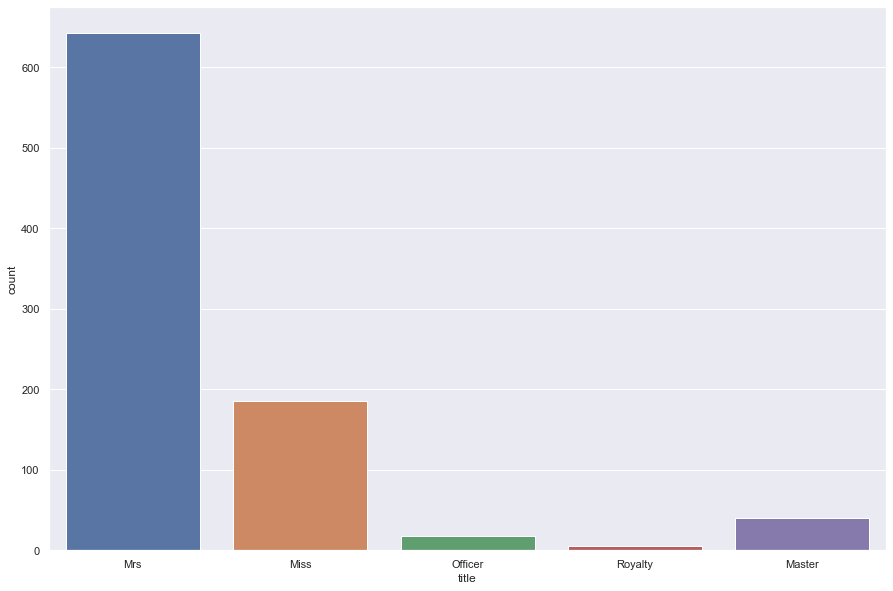

In [45]:
sn.set(rc={'figure.figsize':(15,10)})
sn.countplot(x='title',data=df,)